In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

In [3]:
%matplotlib inline
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
#from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
#from tensorflow.python.framework.ops import EagerTensor
from matplotlib.pyplot import imshow


%matplotlib inline

In [4]:
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator


data_generator = ImageDataGenerator(rescale=1./255, validation_split = 0.3)

train_generator = data_generator.flow_from_directory(r'C:\Users\dhruv\OneDrive\Desktop\7th sem project\corn or maize\Dataset', subset="training")
valid_generator = data_generator.flow_from_directory(r'C:\Users\dhruv\OneDrive\Desktop\7th sem project\corn or maize\Dataset', subset="validation")

Found 2934 images belonging to 4 classes.
Found 1254 images belonging to 4 classes.


In [5]:
print(train_generator.__len__())
print(train_generator[0].__len__())
print(train_generator[0][0].__len__())
print(train_generator[0][0][0].__len__())
print(train_generator[0][0][0][0].__len__())
print(train_generator[0][0][0][0][0].__len__())

print(train_generator[0][0][0][0][0]) # 1 pixel

92
2
32
256
256
3
[0.27058825 0.39607847 0.09803922]


In [6]:
print(valid_generator.__len__())
print(valid_generator[0].__len__())
print(valid_generator[0][0].__len__())
print(valid_generator[0][0][0].__len__())
print(valid_generator[0][0][0][0].__len__())
print(valid_generator[0][0][0][0][0].__len__())

print(valid_generator[0][0][0][0][0]) # 1 pixel

40
2
32
256
256
3
[0.57254905 0.5803922  0.5294118 ]


In [7]:
x_train, y_train = train_generator.next()
print(x_train.__len__(), y_train.__len__())
print(x_train[0].__len__(), y_train[0].__len__())

32 32
256 4


(32, 256, 256, 3) (256, 256, 3)


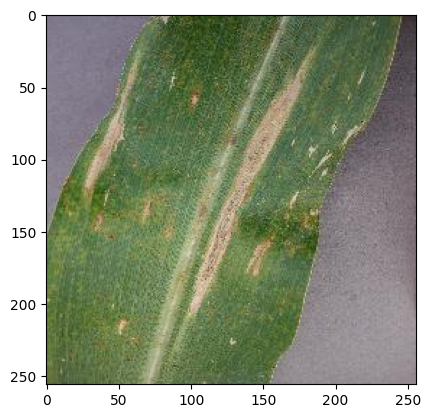

In [8]:
import matplotlib.pyplot as plt
print(x_train.shape, x_train[0].shape)
plt.imshow(x_train[0])
plt.show()

In [9]:
resnetv2 = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    input_shape=(256,256,3)
)

resnetv2.trainable = False

In [10]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomContrast(0.15),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [11]:
model = Sequential([
    data_augmentation,
    resnetv2,
    Dense(512,activation='relu'),
    BatchNormalization(),
    GlobalAveragePooling2D(), # No global - > shape :(None, 4,4,10)
    # Global for Flatten
    Dense(4,activation='softmax')
])

In [12]:
model.compile( optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
model.fit(
        train_generator,
        batch_size=32,
        epochs=10,
        validation_data=valid_generator,
        validation_steps=800
)

Epoch 1/10
92/92 [==============================] - 297s 3s/step - loss: 0.3141 - accuracy: 0.8821 - val_loss: 0.2507 - val_accuracy: 0.9131
Epoch 2/10
92/92 [==============================] - 176s 2s/step - loss: 0.1903 - accuracy: 0.9281
Epoch 3/10
92/92 [==============================] - 171s 2s/step - loss: 0.1655 - accuracy: 0.9356
Epoch 4/10
92/92 [==============================] - 171s 2s/step - loss: 0.1620 - accuracy: 0.9366
Epoch 5/10
92/92 [==============================] - 171s 2s/step - loss: 0.1297 - accuracy: 0.9475
Epoch 6/10
92/92 [==============================] - 172s 2s/step - loss: 0.1083 - accuracy: 0.9571
Epoch 7/10
92/92 [==============================] - 172s 2s/step - loss: 0.1164 - accuracy: 0.9601
Epoch 8/10
92/92 [==============================] - 172s 2s/step - loss: 0.1042 - accuracy: 0.9588
Epoch 9/10
92/92 [==============================] - 171s 2s/step - loss: 0.1041 - accuracy: 0.9622
Epoch 10/10
92/92 [==============================] - 230s 3s/step -

In [18]:
test_generator = data_generator.flow_from_directory(r'C:\Users\dhruv\OneDrive\Desktop\7th sem project\corn or maize\Dataset')

loss, accuracy = model.evaluate(test_generator)
print("Loss is ", loss) # Epoch : 8
print("Accuracy is ", accuracy) # With more Contrast and Rotation
# Contrast : 0.5, Rotate = 0.5

Found 4188 images belonging to 4 classes.
131/131 [==============================] - 248s 2s/step - loss: 0.1385 - accuracy: 0.9501
Loss is  0.1384558081626892
Accuracy is  0.950095534324646


1/1 [==============================] - 0s 186ms/step
Predicted class: Gray_Leaf_Spot


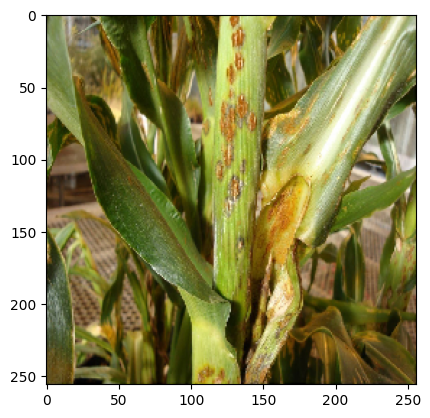

In [20]:
from tensorflow.keras.preprocessing import image

# Load the image
img_path = r'C:\Users\dhruv\OneDrive\Desktop\7th sem project\corn or maize\Dataset\Common_Rust\Corn_Common_Rust (1302).jpg'
img = image.load_img(img_path, target_size=(256, 256))

# Preprocess the image
img_array = image.img_to_array(img)
plt.imshow(img_array/255.)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Rescale to match the rescaling done during training

# Get predictions
predictions = model.predict(img_array)

# Interpret predictions
class_names = train_generator.class_indices
predicted_class = np.argmax(predictions)
predicted_label = list(class_names.keys())[predicted_class]
print("Predicted class:", predicted_label)



In [21]:
model.save(r'C:\Users\dhruv\OneDrive\Desktop\web application\saved_model\corn_resnet.h5')